In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import scikitplot as skplt

import sklearn.preprocessing as preprocessing
import seaborn as sns

In [3]:
titanic_data = pd.read_csv('input/titanic/train.csv')
test_data = pd.read_csv('input/titanic/test.csv')

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


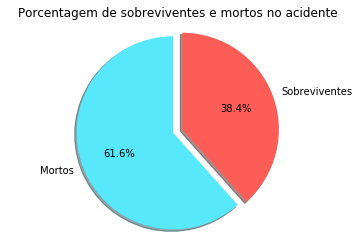

In [5]:
# Taxa de sobreviventes e mortos no desastre
labels = ['Mortos', 'Sobreviventes']
val_counts = titanic_data.Survived.value_counts()

sizes = [val_counts[0], val_counts[1]]
colors = ['#57e8fc', '#fc5e57']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, shadow=True, startangle=90, explode=(0.1,0), autopct='%1.1f%%', colors=colors)
ax.axis('equal')
plt.title('Porcentagem de sobreviventes e mortos no acidente')
plt.show()

In [6]:
# Tratamentos dados ao dataset:
# 1 - Retirada das colunas PassengerId, Cabin, Ticket e Fare
# 2 - Transformar features Sex e Embarked em features numéricas, mantendo a sua categorização
# 3 - Criação de uma feature chamada isAlone, aonde a mesma é uma feature extraída das colunas SibSp and Parch
# 4 - Completar os valores faltantes em Age e Fare com a média

In [7]:
full_data = [titanic_data, test_data]

for dataset in full_data:
    # 1
    dataset.drop(['Ticket', 'Cabin', 'PassengerId', 'Name'], axis=1, inplace = True)
    # 2
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}).astype(int)
    dataset['Embarked'].fillna(titanic_data['Embarked'].dropna().mode()[0], inplace = True)
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    # 3
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    dataset.drop(['Parch', 'SibSp', 'FamilySize'], axis=1, inplace=True)
    # 4
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

In [8]:
y_values = titanic_data['Survived'].values
titanic_data.drop(['Survived'], axis=1, inplace=True)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(titanic_data, y_values, test_size=0.2, stratify=y_values, random_state=32)

In [10]:
# Considerando os sets de treino e teste criados anteriormente (x_train, x_test, y_train, y_test),
# escolha e treine 3 dos modelos apresentados na aula, cujos nomes estão na lista names.
# 1 - Regressão Logística
# 2 - SVM
# 3 - KNN
# 4 - Rede Neural Multi-Camada (MLP)
# 5 - Árvores de Decisão
# 6 - Random Forest
# Lembrando que é necessário que algums parâmetros sejam tratados na hora da escolha do modelo, então
# não se esqueçam de checar a documentação do scikit-learn.

models = []
names = ['Regressão Logística', 'SVM', 'KNN','Rede neural', 'Árvores de Decisão', 'Random Forest']


In [11]:
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from time import process_time
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.metrics import roc_auc_score
import scikitplot as skpl
from keras.utils import to_categorical

epocas = 100

# definir arquitetura MLP - com uma camada intermediária
mlp = MLPClassifier(hidden_layer_sizes=(256,), activation='relu', max_iter=epocas, alpha=1e-4,
                     solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.01)

# definir arquitetura da SVM
svm = svm.SVC(kernel='rbf',C =1, gamma='auto')

# definir arquitetura da Random Forest
randF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=1)


Using TensorFlow backend.


Iteration 1, loss = 4.07155746
Iteration 2, loss = 1.38815624
Iteration 3, loss = 0.67994877
Iteration 4, loss = 0.61157592
Iteration 5, loss = 0.61126563
Iteration 6, loss = 0.60648743
Iteration 7, loss = 0.60491423
Iteration 8, loss = 0.60163750
Iteration 9, loss = 0.59854210
Iteration 10, loss = 0.59861094
Iteration 11, loss = 0.59483042
Iteration 12, loss = 0.59326166
Iteration 13, loss = 0.59174179
Iteration 14, loss = 0.59165067
Iteration 15, loss = 0.59089498
Iteration 16, loss = 0.58877912
Iteration 17, loss = 0.58506786
Iteration 18, loss = 0.58221364
Iteration 19, loss = 0.58393065
Iteration 20, loss = 0.58209641
Iteration 21, loss = 0.58022661
Iteration 22, loss = 0.59091900
Iteration 23, loss = 0.57452689
Iteration 24, loss = 0.57157015
Iteration 25, loss = 0.56922907
Iteration 26, loss = 0.57285131
Iteration 27, loss = 0.56750554
Iteration 28, loss = 0.57120753
Iteration 29, loss = 0.56589309
Iteration 30, loss = 0.56018781
Iteration 31, loss = 0.55646806
Iteration 32, los

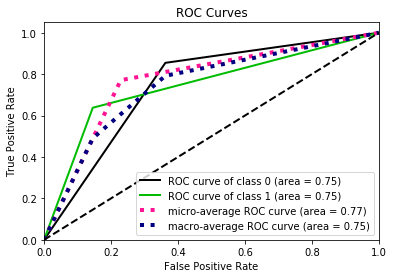

In [12]:
# Aqui fazer um treinamento de x épocas e uma validacao da MLP
start = process_time()
mlp.fit(x_train, y_train)
end = process_time()
time_mlp = end - start
print('Métricas do treinamento da MLP')
print('Tempo de treinamento_mlp com ' + str (epocas) + ' épocas: ' + str(time_mlp))      
print("Erro no final do treinamento: %f" % mlp.loss_)
    
# Métricas da validacão MLP
preds_val_mlp = mlp.predict(x_test)  
print ('Métricas de uma validação MLP')
print("Acertos do conjunto de validação: %f" % mlp.score(x_test, y_test))
cm_val_mlp = confusion_matrix(y_test, preds_val_mlp)
print('Matriz de Confusão')
print(cm_val_mlp)
TP = cm_val_mlp[0,0]
FP = cm_val_mlp[0,1]
FN = cm_val_mlp[1,0]
TN = cm_val_mlp[1,1]

acuracia_mlp = (TP+TN)*100/(len(y_test))
precisao_mlp = TP*100/(TP+FP)
logloss_mlp = log_loss(y_test, preds_val_mlp)
roc_auc_mlp = roc_auc_score(y_test, preds_val_mlp)
print('acurácia_mlp:  '+ str(acuracia_mlp))
print('precisao_mlp:  '+ str(precisao_mlp))
print('logloss_mlp:  '+ str(logloss_mlp)) 
print('AUC_mlp:  '+ str(roc_auc_mlp*100)) 

preds_val_mlp_ = to_categorical(preds_val_mlp, num_classes=None)
skplt.metrics.plot_roc(y_test, preds_val_mlp_)
plt.show()

Métricas do treinamento da SVM
Tempo de treinamento_svm com 100 épocas: 0.046875
Métricas de uma validação SVM
Acertos do conjunto de validação: 0.709497
Matriz de Confusão
[[89 21]
 [31 38]]
acurácia_svm:  70.94972067039106
precisao_svm:  80.9090909090909
logloss_svm:  10.033704827270334
AUC_svm:  67.99077733860342


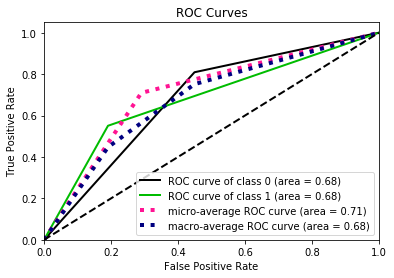

In [13]:
# Aqui fazer um treinamento e validacao da SVM  
start = process_time()
svm.fit(x_train, y_train)
end = process_time()
time_svm = end - start
print('Métricas do treinamento da SVM')
print('Tempo de treinamento_svm com ' + str (epocas) + ' épocas: ' + str(time_svm))

# Métricas da validacão SVM
preds_val_svm = svm.predict(x_test)  
print ('Métricas de uma validação SVM')
print("Acertos do conjunto de validação: %f" % svm.score(x_test, y_test))
cm_val_svm = confusion_matrix(y_test, preds_val_svm)
print('Matriz de Confusão')
print(cm_val_svm)
TP = cm_val_svm[0,0]
FP = cm_val_svm[0,1]
FN = cm_val_svm[1,0]
TN = cm_val_svm[1,1]

acuracia_svm = (TP+TN)*100/(len(y_test))
precisao_svm = TP*100/(TP+FP)
logloss_svm = log_loss(y_test, preds_val_svm)
roc_auc_svm = roc_auc_score(y_test, preds_val_svm)
print('acurácia_svm:  '+ str(acuracia_svm))
print('precisao_svm:  '+ str(precisao_svm))
print('logloss_svm:  '+ str(logloss_svm)) 
print('AUC_svm:  '+ str(roc_auc_svm*100)) 

preds_val_svm_ = to_categorical(preds_val_svm, num_classes=None)
skplt.metrics.plot_roc(y_test, preds_val_svm_)
plt.show() 

Métricas do treinamento da Random Forest
Tempo de treinamento_randF com 100 épocas: 0.109375
Métricas de uma validação Random Forest
Acertos do conjunto de validação: 0.770950
Matriz de Confusão
[[108   2]
 [ 39  30]]
acurácia_randF:  77.09497206703911
precisao_randF:  98.18181818181819
logloss_randF:  7.911125315006695
AUC_randF:  70.83003952569169


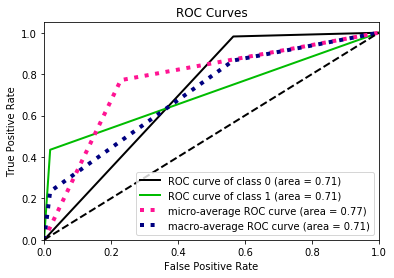

In [14]:
# Aqui fazer um treinamento e validacao da Random Forest  
start = process_time()
randF.fit(x_train, y_train)
end = process_time()
time_randF = end - start
print('Métricas do treinamento da Random Forest')
print('Tempo de treinamento_randF com ' + str (epocas) + ' épocas: ' + str(time_randF))

# Métricas da validacão randF
preds_val_randF= randF.predict(x_test)
print ('Métricas de uma validação Random Forest')
print("Acertos do conjunto de validação: %f" % randF.score(x_test, y_test))
cm_val_randF = confusion_matrix(y_test, preds_val_randF)
print('Matriz de Confusão')
print(cm_val_randF)
TP = cm_val_randF[0,0]
FP = cm_val_randF[0,1]
FN = cm_val_randF[1,0]
TN = cm_val_randF[1,1]
acuracia_randF = (TP+TN)*100/(len(y_test))
precisao_randF = TP*100/(TP+FP)
logloss_randF = log_loss(y_test, preds_val_randF)
roc_auc_randF = roc_auc_score(y_test, preds_val_randF)
print('acurácia_randF:  '+ str(acuracia_randF))
print('precisao_randF:  '+ str(precisao_randF))
print('logloss_randF:  '+ str(logloss_randF)) 
print('AUC_randF:  '+ str(roc_auc_randF*100)) 

preds_val_randF_ = to_categorical(preds_val_randF, num_classes=None)
skplt.metrics.plot_roc(y_test, preds_val_randF_)
plt.show() 

In [15]:
# Considerando os modelos treinados no exercício anterior, re-treine os modelos utilizando o método de 
# validação cruzada (cross_validation no pacote scikit-learn), e compare a acurácia de ambas as situações
# (sem a utilização de validação cruzada e com a utilização de validação cruzada).
#
# Além disso, deve ser apresentada a métrica de log-loss do modelo, a sua respectiva matriz de confusão
# (confusion_matrix no pacote do scikit-learn) e a apresentação da curva ROC do modelo (dica: utilize o pacote
# scikitplot)

In [16]:
from sklearn.model_selection import cross_validate 
from pprint import pprint

# MLP
scores_MLP = cross_validate(mlp, titanic_data, y_values, cv=10, scoring=('neg_log_loss', 'accuracy', 'precision', 'recall'), return_train_score=True)
pprint(scores_MLP)    

# SVM
#scores_SVM = cross_validate(svm, titanic_data, y_values, cv=10, scoring=('neg_log_loss', 'accuracy', 'precision', 'recall'), return_train_score=True)
#pprint(scores_SVM)

# randF
#scores_randF = cross_validate(randF, titanic_data, y_values, cv=10, scoring=('neg_log_loss', 'accuracy', 'precision', 'recall'), return_train_score=True)
#pprint(scores_randF)
                                            

Iteration 1, loss = 3.76345092
Iteration 2, loss = 0.90474827
Iteration 3, loss = 1.22934832
Iteration 4, loss = 1.03234107
Iteration 5, loss = 0.62076438
Iteration 6, loss = 0.63300781
Iteration 7, loss = 0.62506646
Iteration 8, loss = 0.62378705
Iteration 9, loss = 0.62882686
Iteration 10, loss = 0.93081926
Iteration 11, loss = 0.64397278
Iteration 12, loss = 0.64247296
Iteration 13, loss = 0.63947980
Iteration 14, loss = 0.61033716
Iteration 15, loss = 0.60998564
Iteration 16, loss = 0.59414650
Iteration 17, loss = 0.80751723
Iteration 18, loss = 0.62307248
Iteration 19, loss = 0.60643979
Iteration 20, loss = 0.60445255
Iteration 21, loss = 0.60047959
Iteration 22, loss = 0.60780351
Iteration 23, loss = 0.59536370
Iteration 24, loss = 0.66865861
Iteration 25, loss = 0.63516428
Iteration 26, loss = 0.66244734
Iteration 27, loss = 0.65423412
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 3.87508215
Iteration 2, loss = 1.33

C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 5, loss = 0.61551582
Iteration 6, loss = 0.61120249
Iteration 7, loss = 0.64070396
Iteration 8, loss = 0.61392076
Iteration 9, loss = 0.61810596
Iteration 10, loss = 0.61405170
Iteration 11, loss = 0.62525071
Iteration 12, loss = 0.61631470
Iteration 13, loss = 0.61902924
Iteration 14, loss = 0.61232451
Iteration 15, loss = 0.63471860
Iteration 16, loss = 0.62346164
Iteration 17, loss = 0.60776390
Iteration 18, loss = 0.60843918
Iteration 19, loss = 0.62027883
Iteration 20, loss = 0.62176345
Iteration 21, loss = 0.61383645
Iteration 22, loss = 0.61021056
Iteration 23, loss = 0.62028920
Iteration 24, loss = 0.61905947
Iteration 25, loss = 0.60644235
Iteration 26, loss = 0.61903718
Iteration 27, loss = 0.64267645
Iteration 28, loss = 0.62955370
Iteration 29, loss = 0.64121451
Iteration 30, loss = 0.63976443
Iteration 31, loss = 0.61034582
Iteration 32, loss = 0.62568520
Iteration 33, loss = 0.62362538
Iteration 34, loss = 0.62425524
Iteration 35, loss = 0.63184131
Iteration 36,

C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 10, loss = 0.61750639
Iteration 11, loss = 0.61461816
Iteration 12, loss = 0.61958245
Iteration 13, loss = 0.68978738
Iteration 14, loss = 0.61408682
Iteration 15, loss = 0.65110517
Iteration 16, loss = 0.61807672
Iteration 17, loss = 0.61199351
Iteration 18, loss = 0.62040046
Iteration 19, loss = 0.62807634
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 4.65709838
Iteration 2, loss = 0.97912531
Iteration 3, loss = 0.63884810
Iteration 4, loss = 0.62131050
Iteration 5, loss = 0.61428264
Iteration 6, loss = 0.61545149
Iteration 7, loss = 0.62762273
Iteration 8, loss = 0.60943911
Iteration 9, loss = 0.60552376
Iteration 10, loss = 0.63563793
Iteration 11, loss = 0.62217746
Iteration 12, loss = 0.61378533
Iteration 13, loss = 0.65633857
Iteration 14, loss = 0.61361814
Iteration 15, loss = 0.62181981
Iteration 16, loss = 0.62255233
Iteration 17, loss = 0.61316625
Iteration 18, loss = 0.61985903
Iteration 19, loss = 0.

C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 1, loss = 4.35638791
Iteration 2, loss = 0.96575517
Iteration 3, loss = 0.62895230
Iteration 4, loss = 0.63828129
Iteration 5, loss = 0.61365470
Iteration 6, loss = 0.61644227
Iteration 7, loss = 0.63321281
Iteration 8, loss = 0.61266081
Iteration 9, loss = 0.60916925
Iteration 10, loss = 0.64131845
Iteration 11, loss = 0.62153125
Iteration 12, loss = 0.60877701
Iteration 13, loss = 0.61746539
Iteration 14, loss = 0.61485748
Iteration 15, loss = 0.61655053
Iteration 16, loss = 0.61150303
Iteration 17, loss = 0.60563188
Iteration 18, loss = 0.61265975
Iteration 19, loss = 0.62366734
Iteration 20, loss = 0.61202360
Iteration 21, loss = 0.62231546
Iteration 22, loss = 0.61138013
Iteration 23, loss = 0.60890393
Iteration 24, loss = 0.60255075
Iteration 25, loss = 0.60588093
Iteration 26, loss = 0.60793776
Iteration 27, loss = 0.65938980
Iteration 28, loss = 0.60733711
Iteration 29, loss = 0.62188916
Iteration 30, loss = 0.60767403
Iteration 31, loss = 0.65410954
Iteration 32, los

C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
